In [1]:
pip install pyswarm

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.linear_model import Ridge
from pyswarm import pso
from prettytable import PrettyTable


In [3]:
# Load the dataset
data_path = '/content/millenniumofdata_v3_headlines.csv'  # Replace with the path to your dataset
df = pd.read_csv(data_path)

# Display the first few rows of the dataframe
df.head()

,Description,Real GDP of England at market prices,Real GDP of England at factor cost,"Real UK GDP at market prices, geographically-consistent estimate based on post-1922 borders","Real UK GDP at factor cost, geographically-consistent estimate based on post-1922 borders","Index of real UK GDP at factor cost - based on changing political boundaries,",Composite estimate of English and (geographically-consistent) UK real GDP at factor cost,HP-filter of log of real composite estimate of English and UK real GDP at factor cost,"Real UK gross disposable national income at market prices, constant border estimate",Real consumption,...,UK Public sector debt.1,UK Public sector debt.2,Central Government Gross Debt,Central Government Gross Debt.1,Trade deficit,Trade deficit.1,Current account,Current account .1,Current account deficit including estimated non-monetary bullion flows,Current account deficit including estimated non-monetary bullion flows.1
0,Units,"£mn, Chained Volume measure, 2013 prices","£mn, Chained Volume measure, 2013 prices","£mn, Chained Volume measure, 2013 prices","£mn, Chained Volume measure, 2013 prices","GB before 1801, GB+Ireland 1801-1920, GB + Nor...",2013=100,approx. % difference from trend,"£mn, Chained Volume measure, 2013 prices. Nom...","£mn, Chained Volume measure, 2013 prices",...,as a % of nominal GDP: measure 1,as a % of nominal GDP: measure 2,"Financial year end, nominal par value £mn","Financial year end, market value £mn",£mn,as a % of nominal GDP,£mn,as a % of nominal GDP,£mn,as a % of nominal GDP
1,1209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 77 columns):
 #   Column                                                                                       Non-Null Count  Dtype 
---  ------                                                                                       --------------  ----- 
 0   Description                                                                                  809 non-null    object
 1   Real GDP of England at market prices                                                         748 non-null    object
 2   Real GDP of England at factor cost                                                           748 non-null    object
 3   Real UK GDP at market prices, geographically-consistent estimate based on post-1922 borders  318 non-null    object
 4   Real UK GDP at factor cost, geographically-consistent estimate based on post-1922 borders    318 non-null    object
 5   Index of real UK GDP at factor cost - based

In [5]:
df.describe()

,Description,Real GDP of England at market prices,Real GDP of England at factor cost,"Real UK GDP at market prices, geographically-consistent estimate based on post-1922 borders","Real UK GDP at factor cost, geographically-consistent estimate based on post-1922 borders","Index of real UK GDP at factor cost - based on changing political boundaries,",Composite estimate of English and (geographically-consistent) UK real GDP at factor cost,HP-filter of log of real composite estimate of English and UK real GDP at factor cost,"Real UK gross disposable national income at market prices, constant border estimate",Real consumption,...,UK Public sector debt.1,UK Public sector debt.2,Central Government Gross Debt,Central Government Gross Debt.1,Trade deficit,Trade deficit.1,Current account,Current account .1,Current account deficit including estimated non-monetary bullion flows,Current account deficit including estimated non-monetary bullion flows.1
count,809,748,748,318,318,318,748,748,188,188,...,318,318,291,291,202,202,246,246,188,188
unique,809,726,718,318,318,318,711,600,188,186,...,285,287,284,289,179,179,226,110,187,104
top,Units,2811,2028,"£mn, Chained Volume measure, 2013 prices","£mn, Chained Volume measure, 2013 prices","GB before 1801, GB+Ireland 1801-1920, GB + Nor...",0.2643,1.51,"£mn, Chained Volume measure, 2013 prices. Nom...",167474,...,128.5,40.4,797.8,715.5,10.6,0.00,2.8,1.2,103.00,0.7
freq,1,3,3,1,1,1,4,4,1,2,...,3,3,2,2,3,3,4,8,2,5


In [6]:
df.shape

(841, 77)

In [7]:
df.isnull().sum()

,0
Description,32
Real GDP of England at market prices,93
Real GDP of England at factor cost,93
"Real UK GDP at market prices, geographically-consistent estimate based on post-1922 borders",523
"Real UK GDP at factor cost, geographically-consistent estimate based on post-1922 borders",523
...,...
Trade deficit.1,639
Current account,595
Current account .1,595
Current account deficit including estimated non-monetary bullion flows,653


In [8]:
# Remove columns with more than 500 null values
df = df.loc[:, df.isnull().sum() <= 500]

In [9]:
# Display the shape of the dataset after removing columns
print(f"Shape after removing columns: {df.shape}")

# Display the remaining columns
print(f"Remaining columns: {df.columns}")

Shape after removing columns: (841, 15)
Remaining columns: Index(['Description', 'Real GDP of England at market prices',
       'Real GDP of England at factor cost ',
       'Composite estimate of English and (geographically-consistent) UK real GDP at factor cost',
       'HP-filter of log of real composite estimate of English and UK real GDP at factor cost',
       'Export volumes', 'Nominal GDP of England at market prices',
       'Population (England)', 'GDP deflator at market prices',
       'Earnings per head', 'Consumer price index', 'Consumer price inflation',
       'Real consumption wages', 'Wholesale/producer price index',
       'Coin in circulation outside the Bank of England'],
      dtype='object')


In [10]:
# Convert all object columns to numeric, where possible
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.fillna(df.mean())

<ipython-input-10-1dd3e68a5a3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


In [11]:
# Final check for any remaining missing values
print(df.isnull().sum())

# Display the shape of the dataset after handling missing values
print(f"Final shape of the dataset: {df.shape}")

Description                                                                                 0
Real GDP of England at market prices                                                        0
Real GDP of England at factor cost                                                          0
Composite estimate of English and (geographically-consistent) UK real GDP at factor cost    0
HP-filter of log of real composite estimate of English and UK real GDP at factor cost       0
Export volumes                                                                              0
Nominal GDP of England at market prices                                                     0
Population (England)                                                                        0
GDP deflator at market prices                                                               0
Earnings per head                                                                           0
Consumer price index                                        

In [12]:
# Renaming the columns
df.rename(columns={
    'Description': 'description',
    'Real GDP of England at market prices': 'real_gdp_england_market_prices',
    'Real GDP of England at factor cost': 'real_gdp_england_factor_cost',
    'Composite estimate of English and (geographically-consistent) UK real GDP at factor cost': 'composite_gdp_estimate_uk',
    'HP-filter of log of real composite estimate of English and UK real GDP at factor cost': 'hp_filter_log_real_gdp',
    'Export volumes': 'export_volumes',
    'Nominal GDP of England at market prices': 'nominal_gdp_england_market_prices',
    'Population (England)': 'population_england',
    'GDP deflator at market prices': 'gdp_deflator_market_prices',
    'Earnings per head': 'earnings_per_head',
    'Consumer price index': 'consumer_price_index',
    'Consumer price inflation': 'consumer_price_inflation',
    'Real consumption wages': 'real_consumption_wages',
    'Wholesale/producer price index': 'wholesale_producer_price_index',
    'Coin in circulation outside the Bank of England': 'coin_circulation_outside_boengland'
}, inplace=True)

# Display the updated column names
print(df.columns)


Index(['description', 'real_gdp_england_market_prices',
       'Real GDP of England at factor cost ', 'composite_gdp_estimate_uk',
       'hp_filter_log_real_gdp', 'export_volumes',
       'nominal_gdp_england_market_prices', 'population_england',
       'gdp_deflator_market_prices', 'earnings_per_head',
       'consumer_price_index', 'consumer_price_inflation',
       'real_consumption_wages', 'wholesale_producer_price_index',
       'coin_circulation_outside_boengland'],
      dtype='object')


In [13]:
df

,description,real_gdp_england_market_prices,Real GDP of England at factor cost,composite_gdp_estimate_uk,hp_filter_log_real_gdp,export_volumes,nominal_gdp_england_market_prices,population_england,gdp_deflator_market_prices,earnings_per_head,consumer_price_index,consumer_price_inflation,real_consumption_wages,wholesale_producer_price_index,coin_circulation_outside_boengland
0,1612.5,108059.75502,90791.844712,7.047185,0.000013,23090.090231,45559.258942,11232.195545,4.452102,14.625238,4.102104,1.314932,78.138119,10.31559,170.391232
1,1209.0,108059.75502,90791.844712,7.047185,0.000013,23090.090231,45559.258942,3626.000000,4.452102,0.034000,0.080000,1.314932,51.790000,10.31559,170.391232
2,1210.0,108059.75502,90791.844712,7.047185,0.000013,23090.090231,45559.258942,3656.000000,4.452102,0.030000,0.080000,2.580000,44.650000,10.31559,170.391232
3,1211.0,108059.75502,90791.844712,7.047185,0.000013,23090.090231,45559.258942,3686.000000,4.452102,0.026000,0.090000,12.220000,34.860000,10.31559,170.391232
4,1212.0,108059.75502,90791.844712,7.047185,0.000013,23090.090231,45559.258942,3717.000000,4.452102,0.033000,0.080000,-12.320000,49.350000,10.31559,170.391232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,1612.5,108059.75502,90791.844712,7.047185,0.000013,23090.090231,45559.258942,11232.195545,4.452102,14.625238,4.102104,1.314932,78.138119,10.31559,170.391232
837,1612.5,108059.75502,90791.844712,7.047185,0.000013,23090.090231,45559.258942,11232.195545,4.452102,14.625238,4.102104,1.314932,78.138119,10.31559,170.391232
838,1612.5,108059.75502,90791.844712,7.047185,0.000013,23090.090231,45559.258942,11232.195545,4.452102,14.625238,4.102104,1.314932,78.138119,10.31559,170.391232
839,1612.5,108059.75502,90791.844712,7.047185,0.000013,23090.090231,45559.258942,11232.195545,4.452102,14.625238,4.102104,1.314932,78.138119,10.31559,170.391232


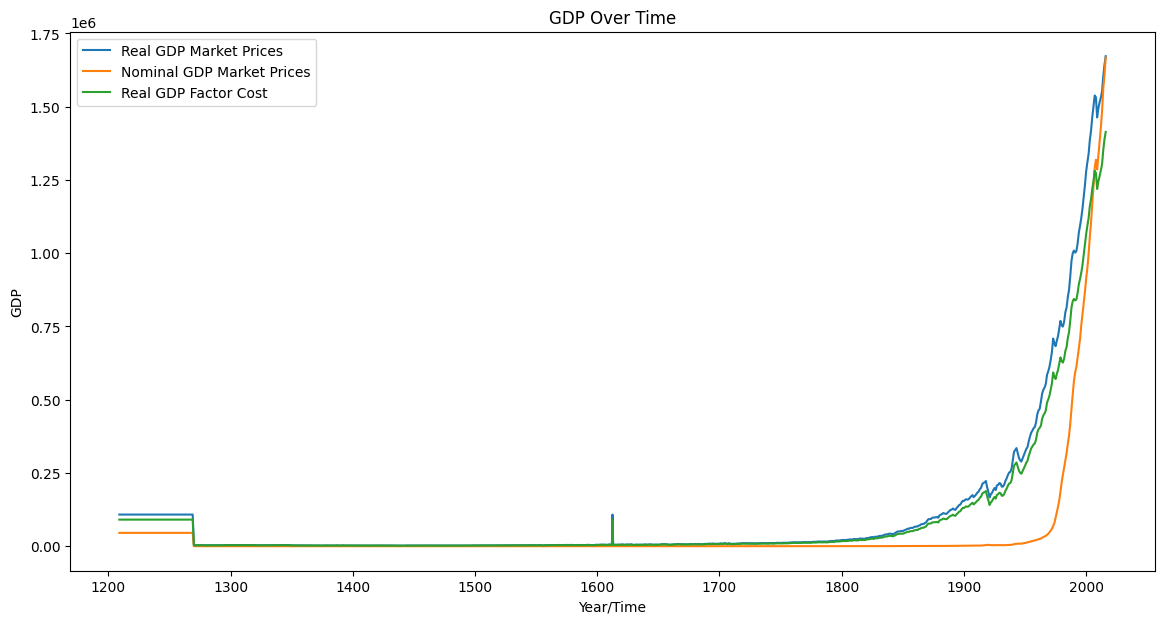

In [14]:
# Assuming 'description' represents the time or year
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='description', y='real_gdp_england_market_prices', label='Real GDP Market Prices')
sns.lineplot(data=df, x='description', y='nominal_gdp_england_market_prices', label='Nominal GDP Market Prices')
sns.lineplot(data=df, x='description', y='Real GDP of England at factor cost ', label='Real GDP Factor Cost')

plt.title('GDP Over Time')
plt.xlabel('Year/Time')
plt.ylabel('GDP')
plt.legend()
plt.show()

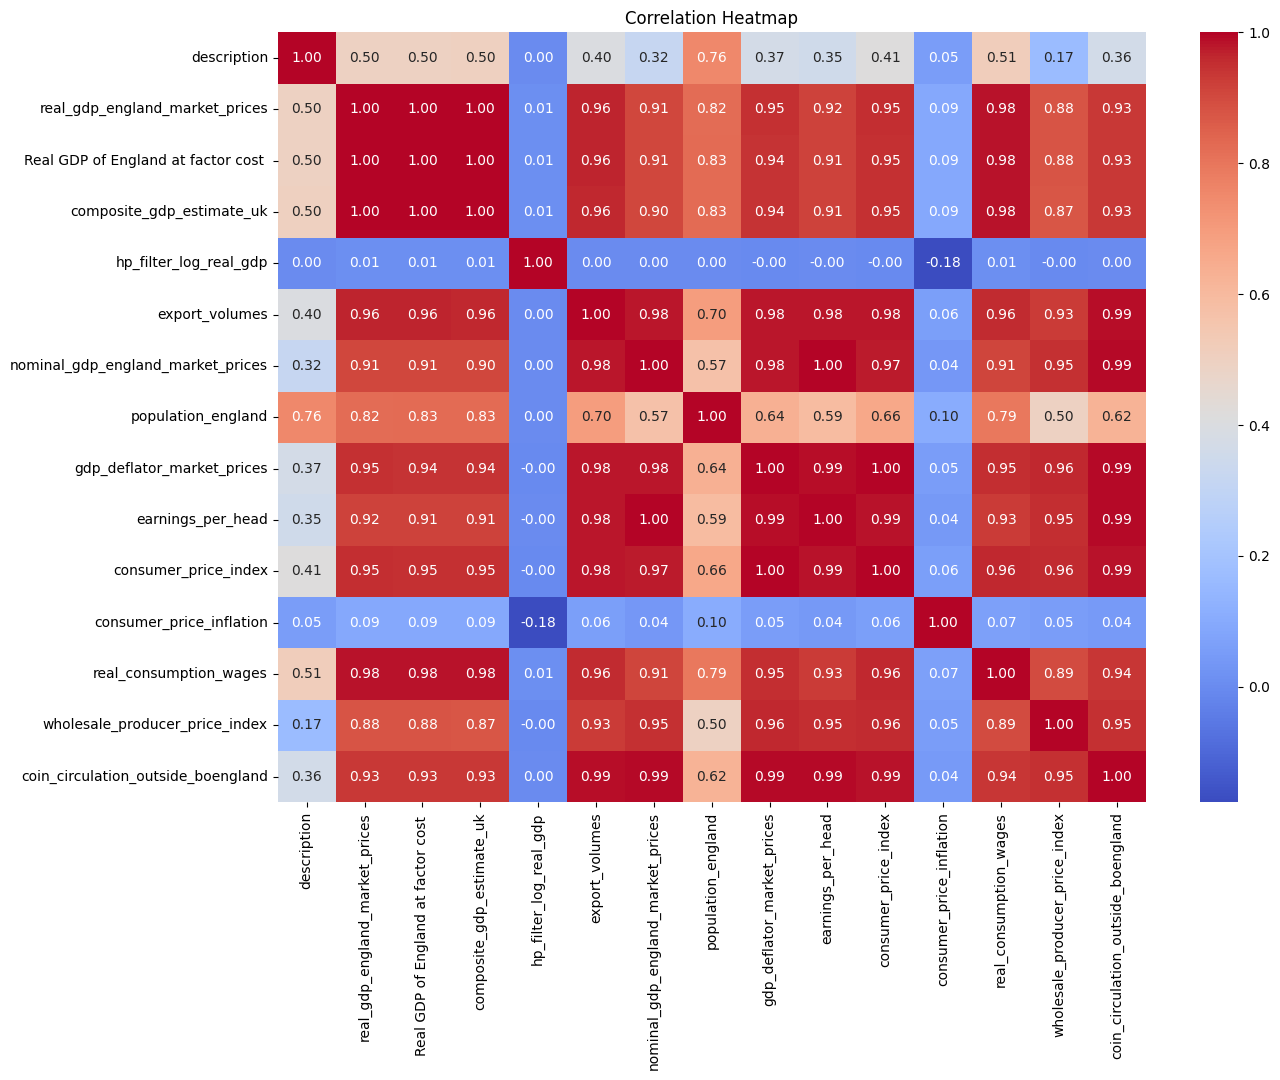

In [15]:
# Correlation heatmap of the dataset
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


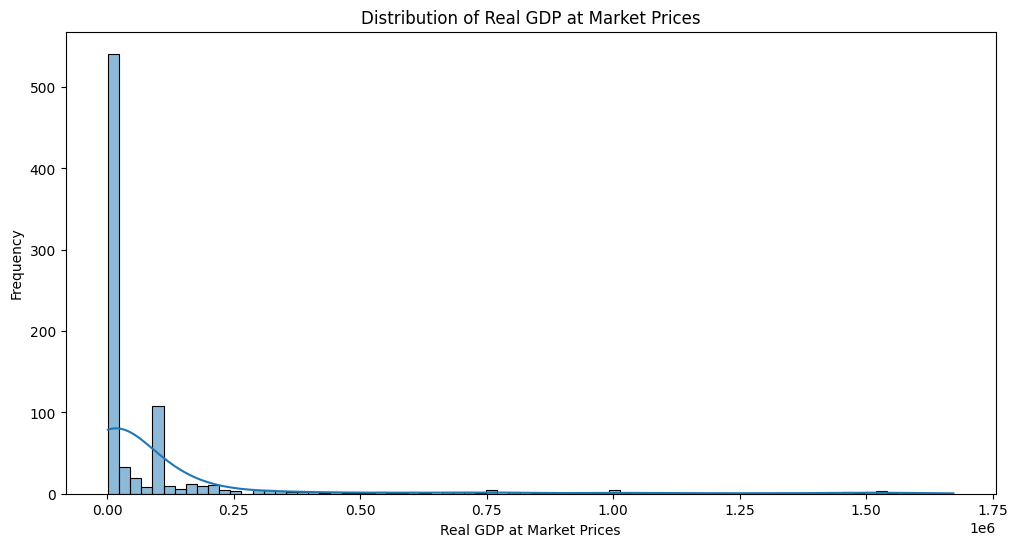

In [16]:
# Distribution of Real GDP at Market Prices
plt.figure(figsize=(12, 6))
sns.histplot(df['real_gdp_england_market_prices'], kde=True)
plt.title('Distribution of Real GDP at Market Prices')
plt.xlabel('Real GDP at Market Prices')
plt.ylabel('Frequency')
plt.show()

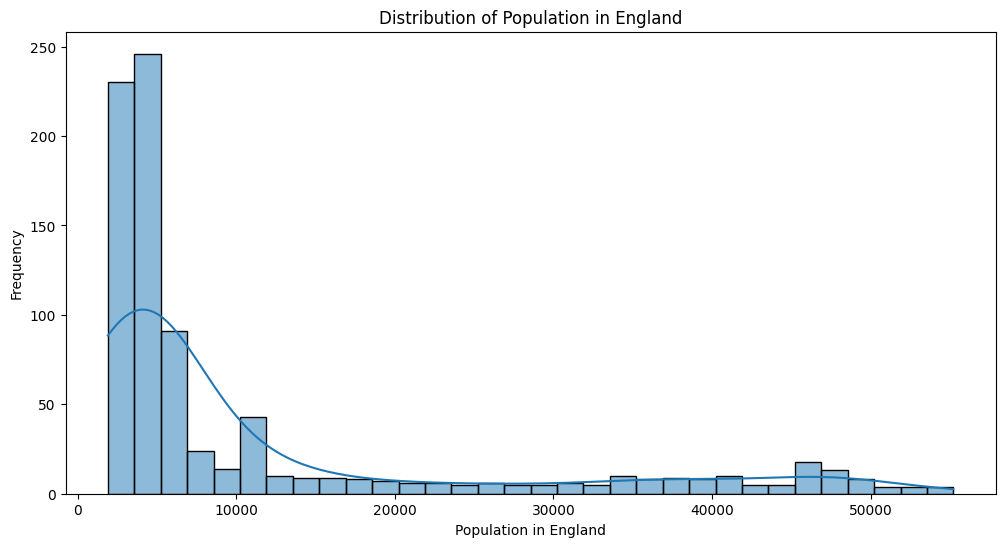

In [17]:
# Distribution of Population in England
plt.figure(figsize=(12, 6))
sns.histplot(df['population_england'], kde=True)
plt.title('Distribution of Population in England')
plt.xlabel('Population in England')
plt.ylabel('Frequency')
plt.show()

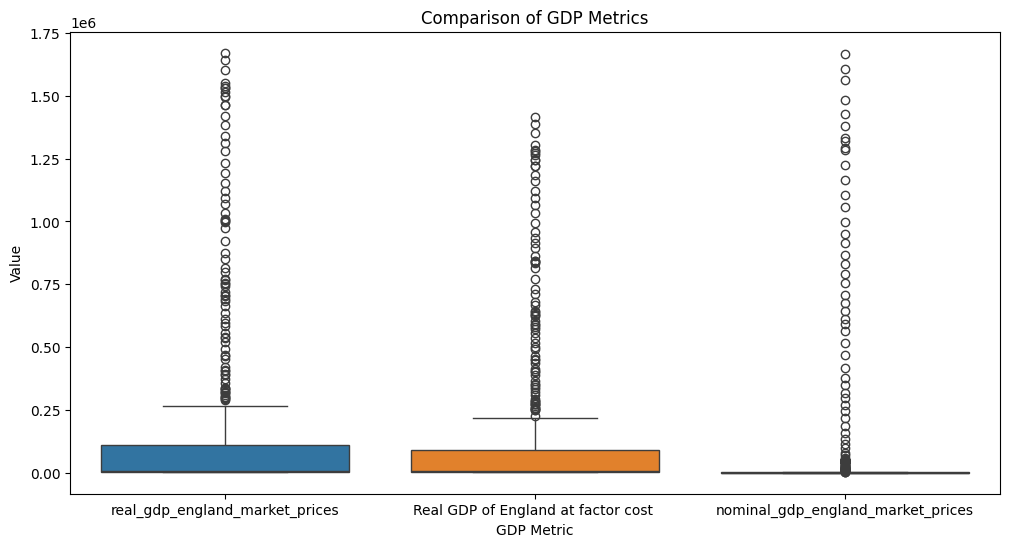

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['real_gdp_england_market_prices', 'Real GDP of England at factor cost ', 'nominal_gdp_england_market_prices']])
plt.title('Comparison of GDP Metrics')
plt.xlabel('GDP Metric')
plt.ylabel('Value')
plt.show()

In [19]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['real_gdp_england_market_prices',
                                           'composite_gdp_estimate_uk',
                                           'export_volumes',
                                           'nominal_gdp_england_market_prices',
                                           'population_england']])

df_scaled = pd.DataFrame(scaled_features, columns=['real_gdp_england_market_prices',
                                                   'composite_gdp_estimate_uk',
                                                   'export_volumes',
                                                   'nominal_gdp_england_market_prices',
                                                   'population_england'])

In [20]:
# Split data into features and target
X = df_scaled  # Use the scaled features
y = df['real_gdp_england_market_prices']  # Replace with your target variable, e.g., 'stock_price'

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.linear_model import LinearRegression

# Initialize and train the regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr_model.predict(X_test)


In [22]:
# Evaluation for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)


# Print evaluation metrics
print(f'Linear Regression - MSE: {mse_lr}')
print(f'Linear Regression - MAE: {mae_lr}')
print(f'Linear Regression - R2 Score: {r2_lr}')


Linear Regression - MSE: 2.507706196726914e-20
Linear Regression - MAE: 9.824695429329336e-11
Linear Regression - R2 Score: 1.0


In [23]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the decision tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt_model.predict(X_test)


In [24]:
# Evaluation for Decision Tree Regressor
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Print evaluation metrics
print(f'Decision Tree Regressor - MSE: {mse_dt}')
print(f'Decision Tree Regressor - MAE: {mae_dt}')
print(f'Decision Tree Regressor - R2 Score: {r2_dt}')

Decision Tree Regressor - MSE: 31825339.44970414
Decision Tree Regressor - MAE: 1651.852071005922
Decision Tree Regressor - R2 Score: 0.9995527706187939


In [25]:
# Initialize and train the SVM model
svm_model = SVR()
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred_svm = svm_model.predict(X_test)


In [26]:
# Evaluation ofor Support Vector Regressor
mse_svm = mean_squared_error(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

# Print evaluation metrics
print(f'Support Vector Regressor - MSE: {mse_svm}')
print(f'Support Vector Regressor - MAE: {mae_svm}')
print(f'Support Vector Regressor - R2 Score: {r2_svm}')

Support Vector Regressor - MSE: 81203390204.86873
Support Vector Regressor - MAE: 104514.81551104617
Support Vector Regressor - R2 Score: -0.14112033307795113


In [27]:
# Initialize and train the random forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Hyperparameter tuning using Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and trained model
print("Best parameters for Random Forest: ", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)


Best parameters for Random Forest:  {'max_depth': 10, 'n_estimators': 200}


In [28]:
#  Evaluation for Random Forest Model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics
print(f'Random Forest - MSE: {mse_rf}')
print(f'Random Forest - MAE: {mae_rf}')
print(f'Random Forest - R2 Score: {r2_rf}')

Random Forest - MSE: 6563270.603285324
Random Forest - MAE: 743.2366788804923
Random Forest - R2 Score: 0.9999077688564726


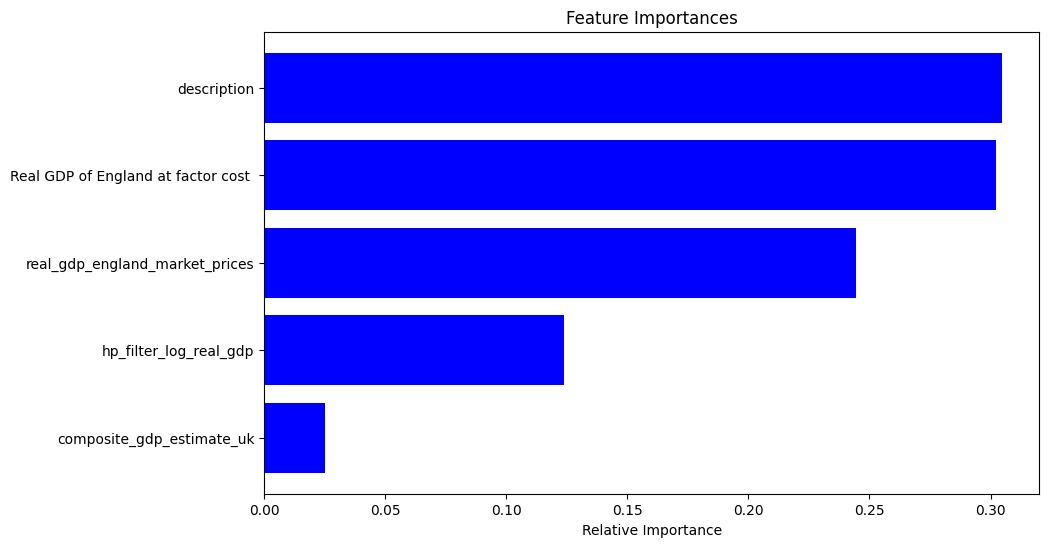

In [29]:
# Feature importance for Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [df.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [30]:
from prettytable import PrettyTable

# Create a PrettyTable instance
table = PrettyTable()

# Define the column names
table.field_names = ["Model", "MSE", "MAE", "R2 Score"]

# Add rows to the table
table.add_row(["Linear Regression", mse_lr, mae_lr, r2_lr])
table.add_row(["Decision Tree Regressor", mse_dt, mae_dt, r2_dt])
table.add_row(["Support Vector Regressor", mse_svm, mae_svm, r2_svm])
table.add_row(["Random Forest", mse_rf, mae_rf, r2_rf])

# Print the table
print(table)


+--------------------------+-----------------------+-----------------------+----------------------+
|          Model           |          MSE          |          MAE          |       R2 Score       |
+--------------------------+-----------------------+-----------------------+----------------------+
|    Linear Regression     | 2.507706196726914e-20 | 9.824695429329336e-11 |         1.0          |
| Decision Tree Regressor  |   31825339.44970414   |   1651.852071005922   |  0.9995527706187939  |
| Support Vector Regressor |   81203390204.86873   |   104514.81551104617  | -0.14112033307795113 |
|      Random Forest       |   6563270.603285324   |   743.2366788804923   |  0.9999077688564726  |
+--------------------------+-----------------------+-----------------------+----------------------+


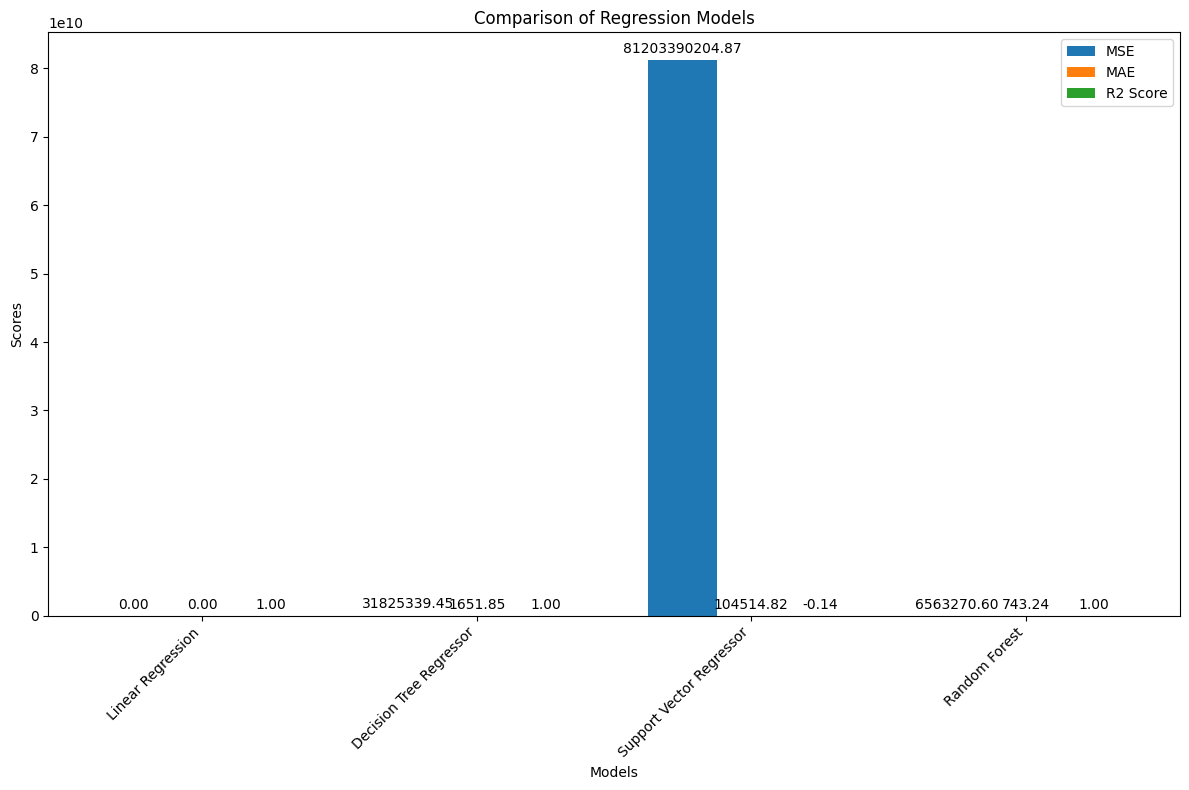

In [31]:
# Define model names and evaluation metrics
models = ['Linear Regression', 'Decision Tree Regressor', 'Support Vector Regressor', 'Random Forest']
mse_values = [mse_lr, mse_dt, mse_svm, mse_rf]
mae_values = [mae_lr, mae_dt, mae_svm, mae_rf]
r2_values = [r2_lr, r2_dt, r2_svm, r2_rf]

x = np.arange(len(models))  # The label locations
width = 0.25  # The width of the bars

fig, ax = plt.subplots(figsize=(12, 8))

# Plotting each metric
rects1 = ax.bar(x - width, mse_values, width, label='MSE')
rects2 = ax.bar(x, mae_values, width, label='MAE')
rects3 = ax.bar(x + width, r2_values, width, label='R2 Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Regression Models')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Add value labels
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

fig.tight_layout()

plt.show()


In [32]:

# Define the objective function for Random Forest
def objective_function_rf(params):
    n_estimators, max_depth = int(params[0]), int(params[1])
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Define the objective function for SVR
def objective_function_svr(params):
    C, epsilon = params[0], params[1]
    model = SVR(C=C, epsilon=epsilon)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Define the objective function for Decision Tree
def objective_function_dt(params):
    max_depth, min_samples_split = int(params[0]), int(params[1])
    model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Define the objective function for Ridge Regression
def objective_function_ridge(params):
    alpha = params[0]
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [33]:
#  bounds for Random Forest
lb_rf = [10, 1]  # Lower bounds
ub_rf = [100, 30]  # Upper bounds
bounds_rf = [lb_rf, ub_rf]

#  bounds for SVR
lb_svr = [0.1, 0.01]  # Lower bounds
ub_svr = [100, 1]  # Upper bounds
bounds_svr = [lb_svr, ub_svr]

# Bounds for Decision Tree
lb_dt = [1, 2]  # Lower bounds for max_depth and min_samples_split
ub_dt = [30, 20]  # Upper bounds for max_depth and min_samples_split
bounds_dt = [lb_dt, ub_dt]

# Bounds for Ridge Regression
lb_ridge = [0.1]  # Lower bound for alpha
ub_ridge = [100]  # Upper bound for alpha
bounds_ridge = [lb_ridge, ub_ridge]

# Run PSO for Random Forest
best_params_rf, _ = pso(objective_function_rf, bounds_rf[0], bounds_rf[1], swarmsize=10, maxiter=5)
print(f"Best parameters for Random Forest: n_estimators = {int(best_params_rf[0])}, max_depth = {int(best_params_rf[1])}")

# Run PSO for SVR
best_params_svr, _ = pso(objective_function_svr, bounds_svr[0], bounds_svr[1], swarmsize=10, maxiter=5)
print(f"Best parameters for SVR: C = {best_params_svr[0]}, epsilon = {best_params_svr[1]}")

# Run PSO for Decision Tree
best_params_dt, _ = pso(objective_function_dt, bounds_dt[0], bounds_dt[1], swarmsize=10, maxiter=5)
print(f"Best parameters for Decision Tree: max_depth = {int(best_params_dt[0])}, min_samples_split = {int(best_params_dt[1])}")

# Run PSO for Ridge Regression
best_params_ridge, _ = pso(objective_function_ridge, bounds_ridge[0], bounds_ridge[1], swarmsize=10, maxiter=5)
print(f"Best parameter for Ridge Regression: alpha = {best_params_ridge[0]}")

Stopping search: maximum iterations reached --> 5
Best parameters for Random Forest: n_estimators = 44, max_depth = 10
Stopping search: maximum iterations reached --> 5
Best parameters for SVR: C = 100.0, epsilon = 1.0
Stopping search: maximum iterations reached --> 5
Best parameters for Decision Tree: max_depth = 8, min_samples_split = 2
Stopping search: maximum iterations reached --> 5
Best parameter for Ridge Regression: alpha = 0.1


In [34]:
# Train and evaluate Random Forest with best parameters
model_rf = RandomForestRegressor(n_estimators=int(best_params_rf[0]), max_depth=int(best_params_rf[1]), random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
a_mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest - MSE: {a_mse_rf}')

# Train and evaluate SVR with best parameters
model_svr = SVR(C=best_params_svr[0], epsilon=best_params_svr[1])
model_svr.fit(X_train, y_train)
y_pred_svr = model_svr.predict(X_test)
a_mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f'SVR - MSE: {a_mse_svr}')

# Train and evaluate Decision Tree with best parameters
model_dt = DecisionTreeRegressor(max_depth=int(best_params_dt[0]), min_samples_split=int(best_params_dt[1]), random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
a_mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'Decision Tree - MSE: {a_mse_dt}')

# Train and Evaluate Linear Regressor with best patameter
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
a_mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Linear Regression - MSE: {a_mse_lr}')



Random Forest - MSE: 4134898.340934462
SVR - MSE: 78862495657.59901
Decision Tree - MSE: 25101513.46293387
Linear Regression - MSE: 2.507706196726914e-20


In [36]:
# Create a table to display the results
table = PrettyTable()
table.field_names = ["Model", "MSE", "Optimized MSE"]

table.add_row(["Random Forest", mse_rf, a_mse_rf])
table.add_row(["SVR", mse_svm, a_mse_svr])
table.add_row(["Decision Tree", mse_dt, a_mse_dt])
table.add_row(["Linear Regression", mse_lr, a_mse_lr])

print(table)

+-------------------+-----------------------+-----------------------+
|       Model       |          MSE          |     Optimized MSE     |
+-------------------+-----------------------+-----------------------+
|   Random Forest   |   6563270.603285324   |   4134898.340934462   |
|        SVR        |   81203390204.86873   |   78862495657.59901   |
|   Decision Tree   |   31825339.44970414   |   25101513.46293387   |
| Linear Regression | 2.507706196726914e-20 | 2.507706196726914e-20 |
+-------------------+-----------------------+-----------------------+


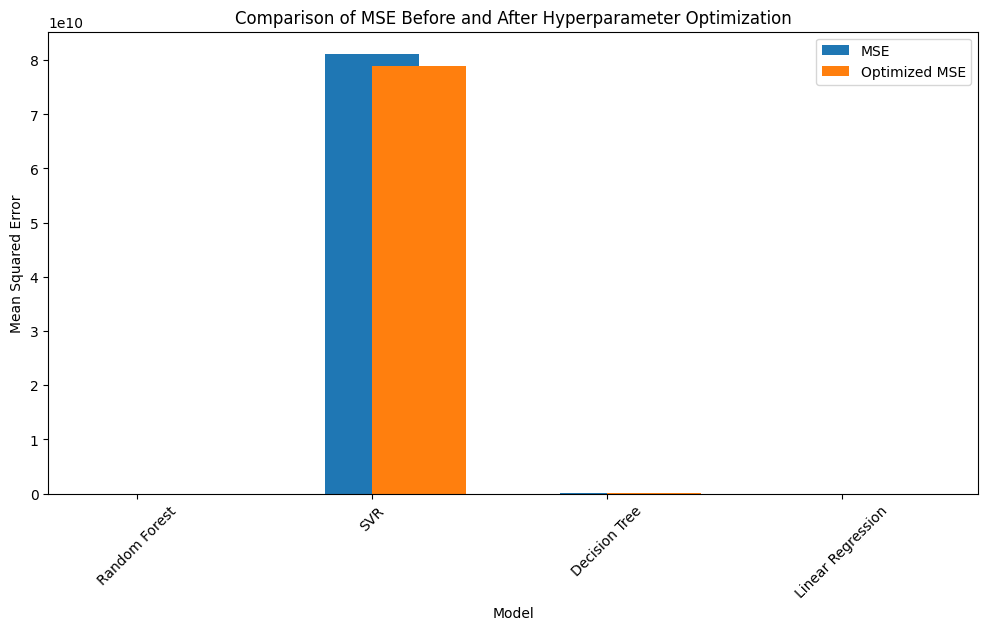

In [37]:
# Plot the comparison
models = ["Random Forest", "SVR", "Decision Tree", "Linear Regression"]
mse_default = [mse_rf, mse_svm, mse_dt, mse_lr]
mse_optimized = [a_mse_rf, a_mse_svr, a_mse_dt, a_mse_lr]

x = range(len(models))

plt.figure(figsize=(12, 6))
plt.bar(x, mse_default, width=0.4, label='MSE', align='center')
plt.bar(x, mse_optimized, width=0.4, label='Optimized MSE', align='edge')

plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of MSE Before and After Hyperparameter Optimization')
plt.xticks(x, models, rotation=45)
plt.legend()
plt.show()